# Decision Trees and Random Forests for Classifying Hand-written  Digits

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Data

In [39]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [40]:
digits.images.shape

(1797, 8, 8)

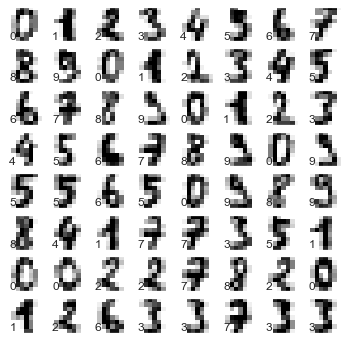

In [41]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap='binary')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, random_state=0)

In [43]:
#create a validation set
rng=np.random.RandomState(0)
N_train=X_train.shape[0]
idx_list=np.arange(0, N_train)
rng.shuffle(idx_list)
train_idx=idx_list[0:int(0.8*N_train)]
val_idx=idx_list[int(0.8*N_train):]

In [44]:
'''
X_val=X_train[val_idx]
Y_val=Y_train[val_idx]
X_train=X_train[train_idx]
Y_train=Y_train[train_idx]
'''

'\nX_val=X_train[val_idx]\nY_val=Y_train[val_idx]\nX_train=X_train[train_idx]\nY_train=Y_train[train_idx]\n'

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=100, random_state=0)
DT.fit(X_train[train_idx], Y_train[train_idx])
Y_test_pred_DT = DT.predict(X_test)

In [46]:
DT.score(X_train, Y_train)

0.9769858945805494

In [47]:
DT.score(X_test, Y_test)

0.8377777777777777

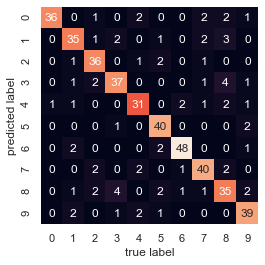

In [48]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_test_pred_DT)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Find the best hypyer-parameters of DT

In [49]:
max_depth_list=np.arange(1, 100, 5)
max_depth_list

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [51]:
acc_train_list=[]
acc_val_list=[]
for max_depth in max_depth_list:
    DT = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    DT.fit(X_train[train_idx], Y_train[train_idx])
    acc_train=DT.score(X_train[train_idx], Y_train[train_idx])
    acc_train_list.append(acc_train)
    acc_val=DT.score(X_train[val_idx], Y_train[val_idx])
    acc_val_list.append(acc_val)
    print("max_depth", max_depth, "acc_val", acc_val)

max_depth 1 acc_val 0.17407407407407408
max_depth 6 acc_val 0.8185185185185185
max_depth 11 acc_val 0.8925925925925926
max_depth 16 acc_val 0.8851851851851852
max_depth 21 acc_val 0.8851851851851852
max_depth 26 acc_val 0.8851851851851852
max_depth 31 acc_val 0.8851851851851852
max_depth 36 acc_val 0.8851851851851852
max_depth 41 acc_val 0.8851851851851852
max_depth 46 acc_val 0.8851851851851852
max_depth 51 acc_val 0.8851851851851852
max_depth 56 acc_val 0.8851851851851852
max_depth 61 acc_val 0.8851851851851852
max_depth 66 acc_val 0.8851851851851852
max_depth 71 acc_val 0.8851851851851852
max_depth 76 acc_val 0.8851851851851852
max_depth 81 acc_val 0.8851851851851852
max_depth 86 acc_val 0.8851851851851852
max_depth 91 acc_val 0.8851851851851852
max_depth 96 acc_val 0.8851851851851852


Text(0, 0.5, 'acc_val')

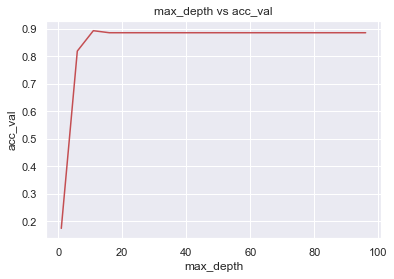

In [52]:
plt.plot(max_depth_list, acc_val_list, '-r')
plt.title('max_depth vs acc_val')
plt.xlabel('max_depth')
plt.ylabel('acc_val')

In [ ]:
max_depth_best=11

In [53]:
DT = DecisionTreeClassifier(max_depth=max_depth_best, random_state=0)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=11, random_state=0)

In [54]:
DT.score(X_train, Y_train)

0.9925760950259837

In [55]:
DT.score(X_test, Y_test)

0.8444444444444444

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=100, random_state=0)
RF.fit(X_train[train_idx], Y_train[train_idx])

RandomForestClassifier(max_depth=100, max_samples=0.8, random_state=0)

In [12]:
Y_test_pred_RF = RF.predict(X_test)

In [13]:
RF.score(X_train, Y_train)

0.9955456570155902

In [14]:
RF.score(X_test, Y_test)

0.9733333333333334

And for good measure, plot the confusion matrix:

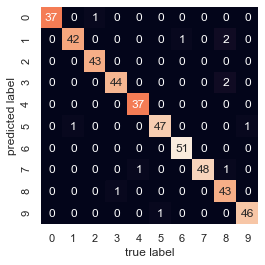

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_test_pred_RF)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Find the best hyper-parameters of RF

In [16]:
max_depth_list=np.arange(1, 100, 5)
max_depth_list

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [17]:
acc_train_list=[]
acc_val_list=[]
for max_depth in max_depth_list:
    RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=max_depth, random_state=0)
    RF.fit(X_train[train_idx], Y_train[train_idx])
    acc_train=RF.score(X_train[train_idx], Y_train[train_idx])
    acc_train_list.append(acc_train)
    acc_val=RF.score(X_train[val_idx], Y_train[val_idx])
    acc_val_list.append(acc_val)
    print("max_depth", max_depth, "acc_val", acc_val)

max_depth 1 acc_val 0.7222222222222222
max_depth 6 acc_val 0.9592592592592593
max_depth 11 acc_val 0.9777777777777777
max_depth 16 acc_val 0.9777777777777777
max_depth 21 acc_val 0.9777777777777777
max_depth 26 acc_val 0.9777777777777777
max_depth 31 acc_val 0.9777777777777777
max_depth 36 acc_val 0.9777777777777777
max_depth 41 acc_val 0.9777777777777777
max_depth 46 acc_val 0.9777777777777777
max_depth 51 acc_val 0.9777777777777777
max_depth 56 acc_val 0.9777777777777777
max_depth 61 acc_val 0.9777777777777777
max_depth 66 acc_val 0.9777777777777777
max_depth 71 acc_val 0.9777777777777777
max_depth 76 acc_val 0.9777777777777777
max_depth 81 acc_val 0.9777777777777777
max_depth 86 acc_val 0.9777777777777777
max_depth 91 acc_val 0.9777777777777777
max_depth 96 acc_val 0.9777777777777777


Text(0, 0.5, 'acc_val')

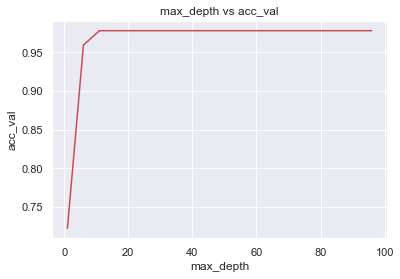

In [18]:
plt.plot(max_depth_list, acc_val_list, '-r')
plt.title('max_depth vs acc_val')
plt.xlabel('max_depth')
plt.ylabel('acc_val')

In [19]:
max_depth_best=11

In [20]:
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=max_depth_best, random_state=0)
RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=11, max_samples=0.8, random_state=0)

In [21]:
RF.score(X_train, Y_train)

1.0

In [23]:
RF.score(X_test, Y_test)

0.9733333333333334

### use GridSearchCV to handle multiple hyper-parameters

In [30]:
param_grid = {'n_estimators':[50, 100, 200],
              'max_samples':[0.5, 0.6, 0.7, 0.8],
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [31]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid=param_grid,
                  scoring='accuracy', 
                  cv=[(train_idx, val_idx)])

In [32]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=[(array([1229,  330, 1344, ...,  750,  859,  952]),
                  array([1120,  628,  606,  164,  106, 1040,  617, 1117,  329,  480,  498,
       1248,   93,  809,  433,   43,  860, 1173,  967,  710, 1314, 1281,
        765,  885,  556, 1278,   69,  514,  509,  340,  221,  146, 1053,
        803,  508, 1200,  176,  804,  168, 1159, 1233,  129,  189,  136,
       1219,  894,  197,  290,   36,  767,  232,  645,   33, 1112, 1299,
       1068,  865,  341, 1085,  199,  429, 1327,  876,  730,  919,  297,
         73,  807,  54...
       1298,  128,  802,   28, 1207,  882,  510,  675,  151,  244,  714,
        543,  544,  639,  697, 1289, 1312,  423,  910, 1171,  659,  797,
       1324, 1201,   99,  850,  448,  755,  976,  115,  777,   72,  845,
        537,  849,  174,   87,  551,  705,  314,  600, 1094,  599,  277,
       1033,  763,  835, 1216,  559,  684]))],
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,

In [33]:
gs.best_params_ 

{'max_depth': 8, 'max_samples': 0.8, 'n_estimators': 100}

In [34]:
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=8, random_state=0)
RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, max_samples=0.8, random_state=0)

In [35]:
RF.score(X_train, Y_train)

1.0

In [36]:
RF.score(X_test, Y_test)

0.9666666666666667